# <b> PELEGANT output analysis tool

PP - V 2024.01.30

## Initialization, formating and useful path

In [1]:
import sys 
import subprocess
from matplotlib import rc
import os 
sys.path.insert(0, '/lstr/sahara/aard/philippe/codes/pelegant_metis/scripts')
import numpy as np
import matplotlib.pyplot as plt
import eleganttool
from eleganttool import import_numericaldata
from IPython.display import display, Markdown

# install directories for PELEGANT and SDDS tools (should not be needed)
sddspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/epics/extensions/bin/linux-x86_64/'
appspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/oag/apps/bin/linux-x86_64/'

FontSize=16
          
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

PWD=subprocess.run('pwd',stdout=subprocess.PIPE)
PWD.stdout

b'/lstr/sahara/aard/philippe/anl_awa_hghe/tracking-strhd/elegant\n'

## Check sdds file used in the &sdds_beam input in PELEGANT

In [2]:
input='cath2yag4.sdds'

In [3]:
# dump formated table for beam parameter
Z1, Z2, Z3=eleganttool.dumpParam(input)
display(Markdown(Z1))
display(Markdown(Z2))
display(Markdown(Z3))

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>pAverage</th>    <th>St</th>    <th>Sdelta</th>    <th>s56</th>  </tr>  <tr>    <th></th>    <th>s</th>    <th></th>    <th>s</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">9.767317e+01</td>    <td style="text-align:center">6.587717e-12</td>    <td style="text-align:center">7.710349e-03</td>    <td style="text-align:center">-4.986004e-14</td>  </tr></table><br>

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>enx</th>    <th>ecnx</th>    <th>alphax</th>    <th>betax</th>  </tr>  <tr>    <th>m</th>    <th>m</th>    <th></th>    <th>m</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">4.886814e-06</td>    <td style="text-align:center">4.885969e-06</td>    <td style="text-align:center">-8.834699e-01</td>    <td style="text-align:center">1.551619e+01</td>  </tr></table><br>

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>eny</th>    <th>ecny</th>    <th>alphay</th>    <th>betay</th>  </tr>  <tr>    <th>m</th>    <th>m</th>    <th></th>    <th>m</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">4.897836e-06</td>    <td style="text-align:center">4.897484e-06</td>    <td style="text-align:center">-8.994785e-01</td>    <td style="text-align:center">1.532344e+01</td>  </tr></table><br>

## Example: plot beta function along beamline

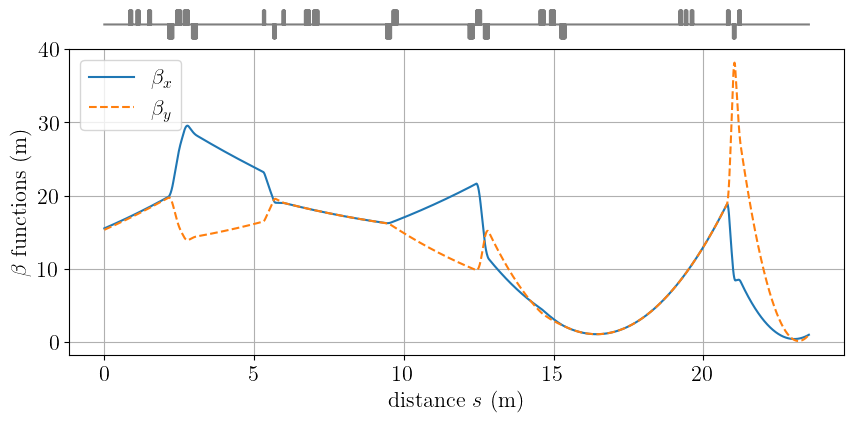

In [4]:
rootname='yag4toend_fit'
# the eleganttool functions will look for rootname+'.twi' +'.s' 
eleganttool.plotCS(rootname, eta=False)

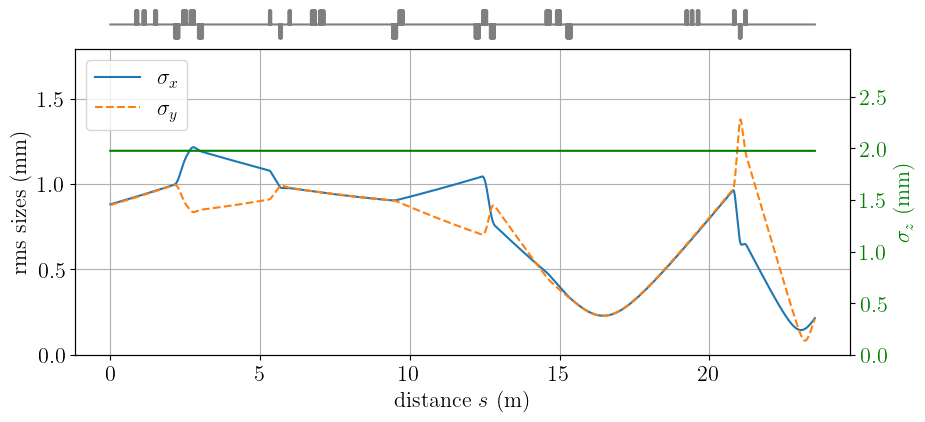

In [5]:
eleganttool.plotSize(rootname)

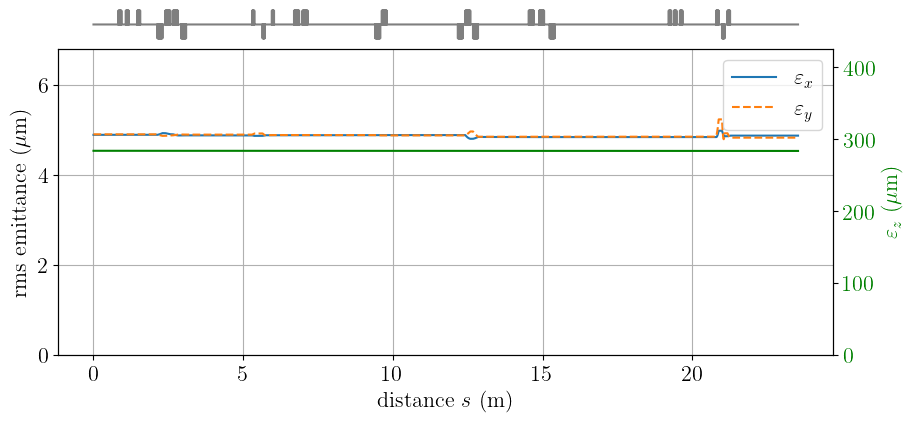

In [6]:
eleganttool.plotEmit(rootname)

In [7]:
def plotsummaryPSpace(filename,nBins=201, rmCorrLPS=0, frac=100):
    x  = eleganttool.import_numericaldata(filename, column='x')
    xp = eleganttool.import_numericaldata(filename, column='xp')
    y  = eleganttool.import_numericaldata(filename, column='y')
    yp = eleganttool.import_numericaldata(filename, column='yp')
    t  = eleganttool.import_numericaldata(filename, column='t')
    t  = t - t.mean()
    p  = eleganttool.import_numericaldata(filename, column='p')
    p  = p/p.mean()-1
    if rmCorrLPS>0: 
       cc = np.polyfit (t,p,int(rmCorrLPS))
       p  = p - np.polyval(cc,t)
    MinCnt = 20
    print (MinCnt)
    print ('number of macroparticles:', len(t))
    fig, axlist = plt.subplots(2,2, figsize=(10, 10))
    ax = axlist[0, 0]
    ax.hexbin(x*1e3, y*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax.set_xlabel('$x$ (mm)')
    ax.set_ylabel('$y$ (mm)')
    ax = axlist[0, 1]
    ax.set_xlabel('$x$ (mm)')
    ax.set_ylabel('$x\'$ (mrd)')
    ax.hexbin(x*1e3, xp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax = axlist[1,0]
    ax.set_xlabel('$y$ (mm)')
    ax.set_ylabel('$y\'$ (mrd)')
    ax.hexbin(y*1e3, yp*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax = axlist[1,1]
    ax.hexbin(t*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
    ax.set_xlabel('$t$ (ps)')
    ax.set_ylabel(r'$\delta$')
    plt.tight_layout()

20
number of macroparticles: 199999
20
number of macroparticles: 199999


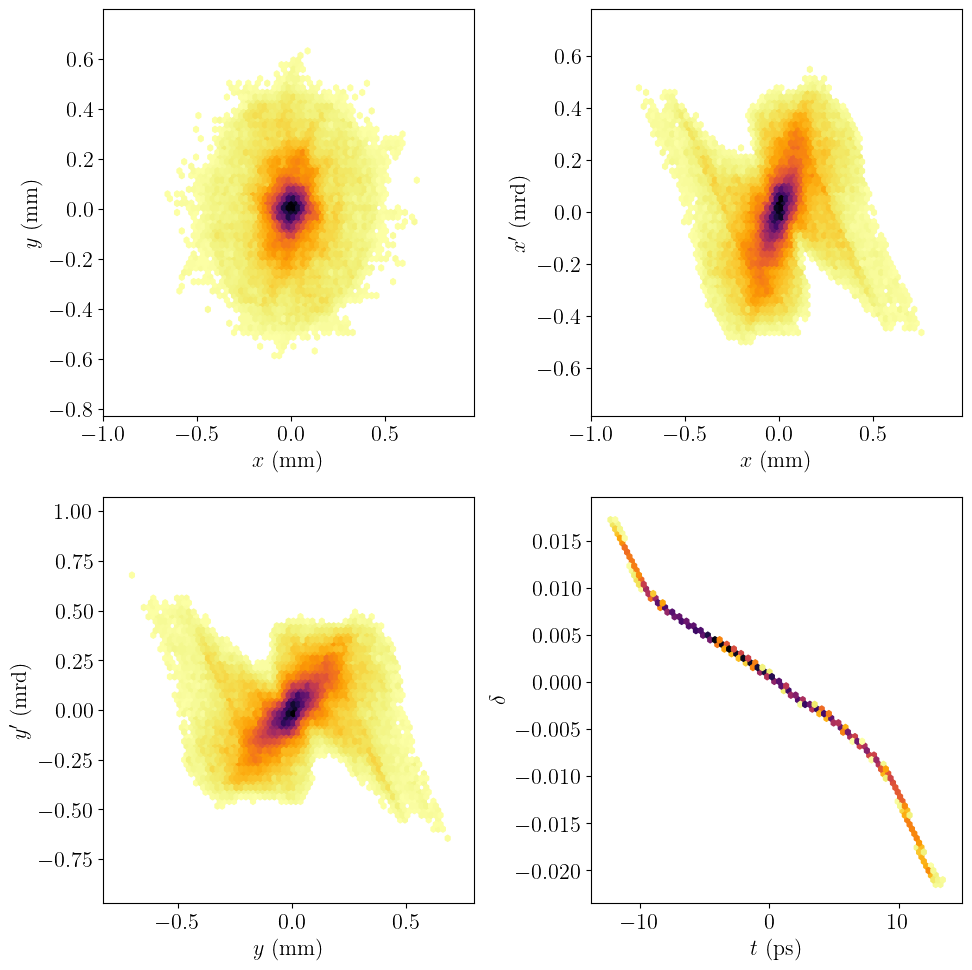

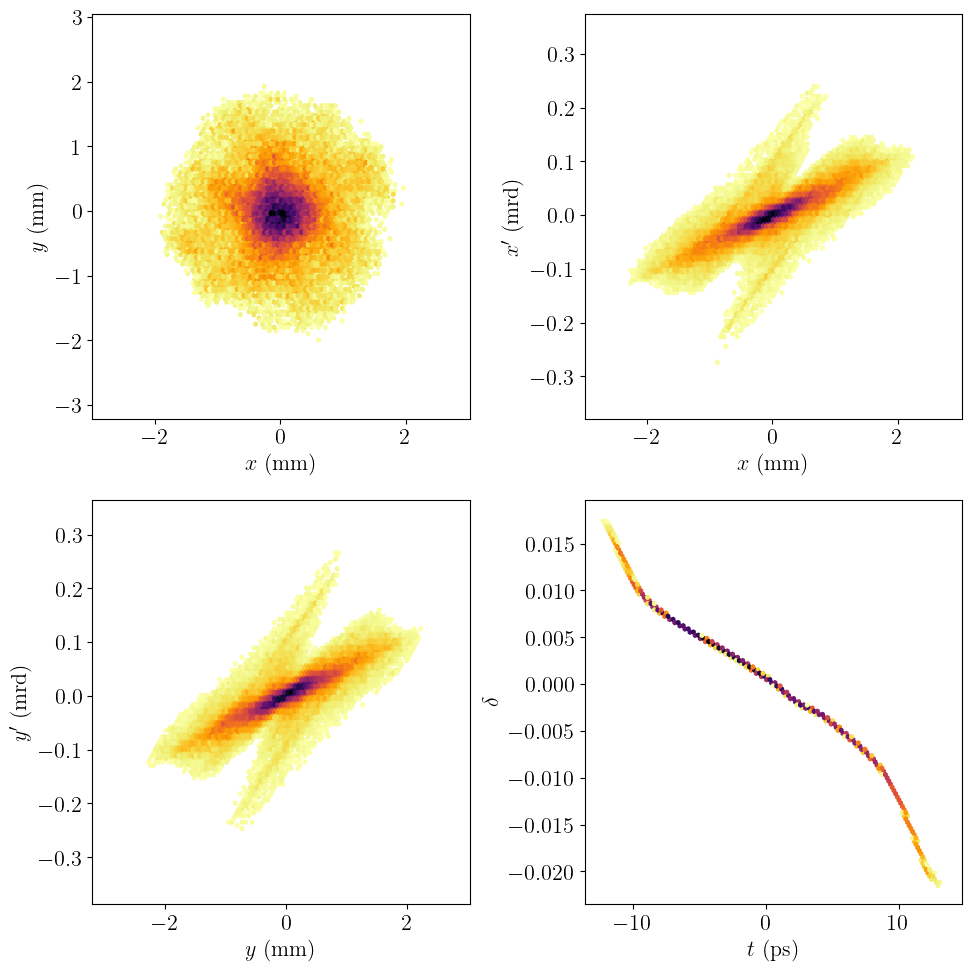

In [8]:
plotsummaryPSpace('yag4toend_fit.DWL', nBins=71)
plotsummaryPSpace('cath2yag4.sdds', nBins=101)